<a href="https://colab.research.google.com/github/williamG7/La-calidad-del-vino-analysis./blob/main/La_calidad_del_vino_GuzmanWilliam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La calidad del vino

![ampolles-vi](https://vadevi.elmon.cat/app/uploads/sites/18/2022/02/pinot_noir_cat-800x405.webp)

# Objectivo

A partir de los [datos de diversos vinos](https://raw.githubusercontent.com/raimonizard/datasets/refs/heads/main/wine_quality_classification.csv), crear un **árbol de decisión** que permita **determinar la calidad de cada vino**.

Este conjunto de datos sintético está diseñado para **tareas de clasificación** relacionadas con la calidad del vino. Incluye 1.000 muestras con atributos químicos clave como la acidez, el nivel de azúcar, el contenido de alcohol y la densidad. Cada muestra está etiquetada con una clase de calidad del vino: baja, media o alta.

Características:
* **fixed_acidity**: Nivel de acidez fija
* **residual_sugar**: Nivel de azúcar residual después de la fermentación
* **alcohol**: Contenido de alcohol (%)
* **density**: Densidad del líquido
* **quality_label**: Clase de calidad del vino (baja / media / alta)

Este Árbol de Decisión debe ser capaz de encontrar **qué grado de impacto tiene** cada una de las **variables independientes** para catalogar cada uno de los vinos.

Variable **objetivo dependiente**: **quality_label**

# Tareas a realizar

### 1. Análisis Exploratorio de Datos (EDA)
El primer paso consiste en realizar una exploración exhaustiva del dataset para comprender su estructura. Esto incluye identificar el número de registros y columnas, verificar los tipos de datos, detectar la presencia de valores nulos y analizar las correlaciones entre las propiedades químicas del vino.

### 2. Construcción y Entrenamiento del Modelo
Procederemos a implementar un **Árbol de Decisión** para identificar los patrones que determinan la calidad del vino. El objetivo es que el modelo aprenda la jerarquía de las variables independientes ($X$: *fixed_acidity, residual_sugar, alcohol, density*) y su impacto en la variable dependiente ($y$: *quality_label*).

> **Nota técnica:** Utilizaremos la clase `DecisionTreeClassifier()` de la librería Scikit-Learn para el ajuste del modelo.

### 3. Visualización de la Estructura de Decisión
Una vez entrenado el modelo, generaremos una representación gráfica del árbol. Esta visualización es clave para entender cómo el algoritmo segmenta los datos y toma decisiones lógicas en cada rama.

### 4. Interpretación de Nodos y Métricas de Pureza
En este apartado, analizaremos la arquitectura del árbol examinando los siguientes indicadores en los nodos:
* **Gini**: Índice de impureza del nodo.
* **Samples**: Número de muestras que alcanzan ese punto.
* **Value**: Distribución de las clases en cada etapa.

Evaluaremos ejemplos específicos del diagrama para explicar el proceso de clasificación.

### 5. Validación del Modelo y Predicciones
Para verificar la fiabilidad del sistema, realizaremos pruebas de predicción utilizando registros extraídos del dataset original. Compararemos los resultados obtenidos por el modelo con las etiquetas reales para asegurar una catalogación coherente.

### 6. Inferencia sobre Nuevos Casos (Vinos Sintéticos)
Como prueba final, simularemos la creación de **dos nuevos vinos** asignando valores personalizados a sus atributos químicos. Aplicaremos el modelo entrenado para determinar qué categoría de calidad les asignaría el algoritmo basándose en las reglas aprendidas.

 ## importacion de librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1- Cargar y explorar datos

In [ ]:
# Cargar dataset
url = 'https://raw.githubusercontent.com/raimonizard/datasets/refs/heads/main/wine_quality_classification.csv'
df = pd.read_csv(url)
print(f"Dataset cargado: {df.shape[0]} vinos, {df.shape[1]} columnas")

Dataset cargado: 1000 vinos, 5 columnas


In [ ]:
# primeas filas del dataset
print("primeras 5 filas del dataset:\n")
df.head()

primeras 5 filas del dataset:



,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


In [ ]:
# Informacion general del dataset
print(" Informacion general del datase:\n")
df.info()

 Informacion general del datase:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fixed_acidity   1000 non-null   float64
 1   residual_sugar  1000 non-null   float64
 2   alcohol         1000 non-null   float64
 3   density         1000 non-null   float64
 4   quality_label   1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
# verificar valores nulos
print("valores nulos por columna:\n")
valoresNulos = df.isnull().sum()
print(valoresNulos)
print(f"\nTotal de valores nulos {valoresNulos.sum()}")

valores nulos por columna:

fixed_acidity     0
residual_sugar    0
alcohol           0
density           0
quality_label     0
dtype: int64

Total de valores nulos 0


                       fixed_acidity  residual_sugar   alcohol   density  \
fixed_acidity               1.000000       -0.054987  0.068460 -0.006881   
residual_sugar             -0.054987        1.000000 -0.020781 -0.005948   
alcohol                     0.068460       -0.020781  1.000000  0.022209   
density                    -0.006881       -0.005948  0.022209  1.000000   
quality_label_encoded       0.025201       -0.051264  0.029950 -0.022511   

                       quality_label_encoded  
fixed_acidity                       0.025201  
residual_sugar                     -0.051264  
alcohol                             0.029950  
density                            -0.022511  
quality_label_encoded               1.000000  


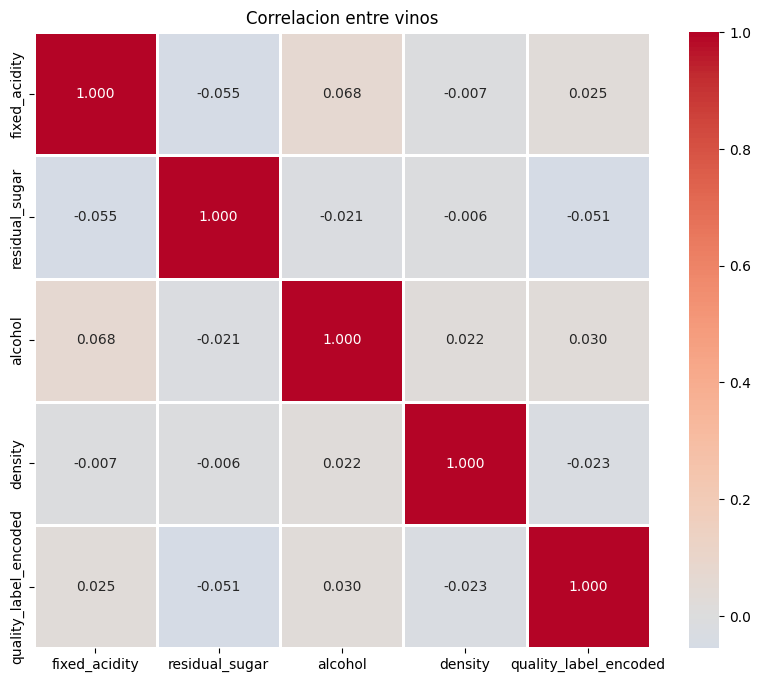

In [ ]:
# correlacion entre columnas

# Convertir quality_label a valores numéricos ordinales
df['quality_label_encoded'] = df['quality_label'].map({
    'low': 0,
    'medium': 1,
    'high': 2
})

colum = ['fixed_acidity','residual_sugar','alcohol','density','quality_label_encoded']
corr = df[colum].corr()
print(corr)

# visualizacion correlacion
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, fmt='.3f')
plt.title('Correlacion entre vinos')
plt.show()

## 2- Arbol de decision

###  Preparar las variables X e Y

In [ ]:
# Variables independientes
X = df[['fixed_acidity', 'residual_sugar', 'alcohol', 'density']]

# Variable dependiente
y = df['quality_label']

###  Crear el modelo de árbol de decision

In [ ]:
# Crear el clasificador
modelo_arbol = DecisionTreeClassifier(max_depth=4, random_state=42)

### Entrenar el modelo

In [ ]:
# Entrenar el modelo con los datos
modelo_arbol.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

### Visualizar el árbol

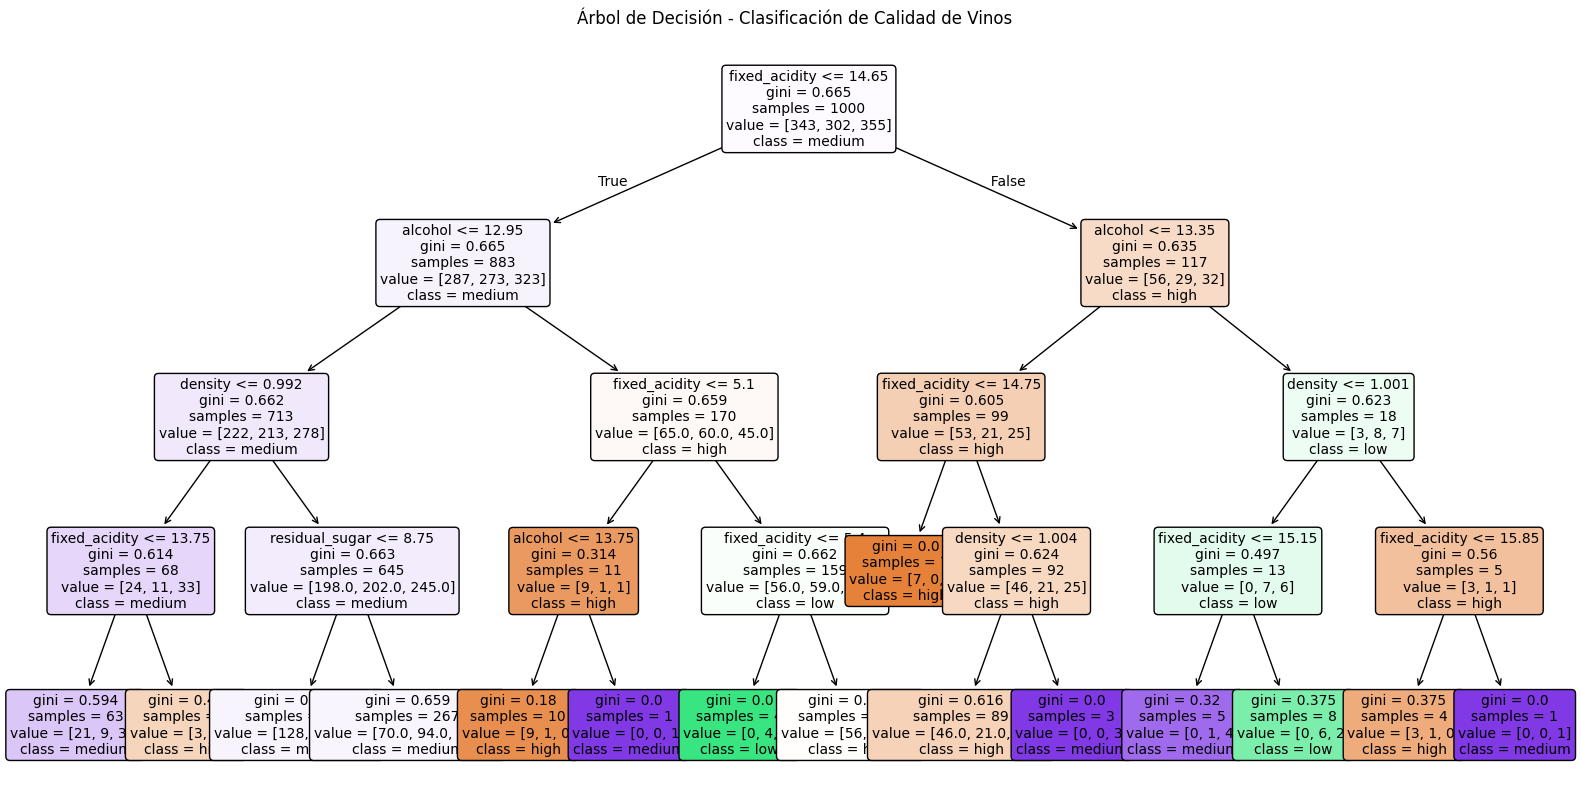

In [ ]:
# Crear la visualización del árbol
plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol,
          feature_names=['fixed_acidity', 'residual_sugar', 'alcohol', 'density'],
          class_names=['high', 'low', 'medium'], filled=True, rounded=True, fontsize=10)
plt.title('Árbol de Decisión - Clasificación de Calidad de Vinos')
plt.show()

## 3- Evaluacion del Arbol de desicion


EVALUACIÓN DEL ÁRBOL DE DECISIÓN

NODO RAÍZ:
- Condición: fixed_acidity <= 14.65
- gini = 0.665 (muy mezclado, tiene vinos de todas las calidades)
- samples = 1000 (todos los vinos del dataset)
- value = [343, 302, 355] (343 high, 302 low, 355 medium)
- class = medium (la clase mayoritaria)

INTERPRETACIÓN: La acidez fija es la variable MÁS importante porque
aparece primero y divide todo el dataset.

EJEMPLO DE NODO PURO:
- gini = 0.0
- samples = 7
- value = [7, 0, 0]
- class = high

INTERPRETACIÓN: Este nodo clasifica perfectamente 7 vinos como HIGH.
El gini=0 indica que no hay mezcla, todos son de la misma clase.

JERARQUÍA DE VARIABLES (de más a menos importante):
1. fixed_acidity (nodo raíz)
2. alcohol (segundo nivel)
3. density (niveles inferiores)
4. residual_sugar (menos relevante)

CONCLUSIÓN: El árbol muestra que la acidez y el alcohol son los factores
más importantes para determinar la calidad del vino.

## 4- Predicciones

### Seleccionar algunos vinos del dataset

In [ ]:
# Seleccionar 5 vinos aleatorios del dataset para probar
vinos_prueba = df.sample(n=5, random_state=42)

print("Vinos seleccionados para prueba:")
print(vinos_prueba[['fixed_acidity', 'residual_sugar', 'alcohol', 'density', 'quality_label']])

Vinos seleccionados para prueba:
     fixed_acidity  residual_sugar  alcohol  density quality_label
521            7.0             9.2     13.9   0.9944          high
737            7.8            14.0     13.5   1.0022           low
740           10.2             7.5     11.4   1.0019        medium
660           15.6             7.9      9.5   0.9977          high
411           14.7             1.2     10.8   0.9949          high


### Preparar los datos para la predicción

In [ ]:
# Extraer las características X de los vinos de prueba
X_prueba = vinos_prueba[['fixed_acidity', 'residual_sugar', 'alcohol', 'density']]

# Extraer las etiquetas reales y para comparar después
y_real = vinos_prueba['quality_label']

print("\nCaracterísticas de los vinos:")
print(X_prueba)
print("\nCalidad real:")
print(y_real.values)


Características de los vinos:
     fixed_acidity  residual_sugar  alcohol  density
521            7.0             9.2     13.9   0.9944
737            7.8            14.0     13.5   1.0022
740           10.2             7.5     11.4   1.0019
660           15.6             7.9      9.5   0.9977
411           14.7             1.2     10.8   0.9949

Calidad real:
['high' 'low' 'medium' 'high' 'high']


### Hacer la predicción con el modelo

In [ ]:
# Usar el modelo entrenado para predecir
y_prediccion = modelo_arbol.predict(X_prueba)

print("\nCalidad predicha por el modelo:")
print(y_prediccion)


Calidad predicha por el modelo:
['high' 'high' 'medium' 'high' 'high']


### Comparar predicciones con valores reales

In [ ]:
# Crear una tabla comparativa
comparacion = pd.DataFrame({
    'fixed_acidity': X_prueba['fixed_acidity'].values,
    'residual_sugar': X_prueba['residual_sugar'].values,
    'alcohol': X_prueba['alcohol'].values,
    'density': X_prueba['density'].values,
    'Calidad Real': y_real.values,
    'Calidad Predicha': y_prediccion,
    'Correcto': y_real.values == y_prediccion
})


print("COMPARACIÓN: PREDICCIÓN vs REALIDAD")
print(comparacion)
print("\n")

# Calcular el porcentaje de aciertos
aciertos = (y_real.values == y_prediccion).sum()
total = len(y_prediccion)
porcentaje = (aciertos / total) * 100

print(f"Resultados: {aciertos}/{total} predicciones correctas ({porcentaje:.1f}%)")

COMPARACIÓN: PREDICCIÓN vs REALIDAD
   fixed_acidity  residual_sugar  alcohol  density Calidad Real  \
0            7.0             9.2     13.9   0.9944         high   
1            7.8            14.0     13.5   1.0022          low   
2           10.2             7.5     11.4   1.0019       medium   
3           15.6             7.9      9.5   0.9977         high   
4           14.7             1.2     10.8   0.9949         high   

  Calidad Predicha  Correcto  
0             high      True  
1             high     False  
2           medium      True  
3             high      True  
4             high      True  


Resultados: 4/5 predicciones correctas (80.0%)


## 5- Creacion de 2 vinos nuevos




In [ ]:
vino_1 = {
    'fixed_acidity': 7.5,
    'residual_sugar': 3.0,
    'alcohol': 12.0,
    'density': 0.994
}

vino_2 = {
    'fixed_acidity': 15.0,
    'residual_sugar': 1.5,
    'alcohol': 13.5,
    'density': 0.998
}

# Convertir a DataFrame para que el modelo pueda procesarlos
vinos_nuevos = pd.DataFrame([vino_1, vino_2])

print("VINOS NUEVOS CREADOS:")
print(vinos_nuevos)

VINOS NUEVOS CREADOS:
   fixed_acidity  residual_sugar  alcohol  density
0            7.5             3.0     12.0    0.994
1           15.0             1.5     13.5    0.998


In [ ]:
# Predecir la calidad de los vinos nuevos
predicciones = modelo_arbol.predict(vinos_nuevos)
print("PREDICCIONES:")

for i, (pred, vino) in enumerate(zip(predicciones, [vino_1, vino_2]), 1):
    print(f"\nVino {i}:")
    print(f"  - Acidez fija: {vino['fixed_acidity']}")
    print(f"  - Azúcar residual: {vino['residual_sugar']}")
    print(f"  - Alcohol: {vino['alcohol']}%")
    print(f"  - Densidad: {vino['density']}")
    print(f"  → Calidad predicha: {pred.upper()}")

PREDICCIONES:

Vino 1:
  - Acidez fija: 7.5
  - Azúcar residual: 3.0
  - Alcohol: 12.0%
  - Densidad: 0.994
  → Calidad predicha: MEDIUM

Vino 2:
  - Acidez fija: 15.0
  - Azúcar residual: 1.5
  - Alcohol: 13.5%
  - Densidad: 0.998
  → Calidad predicha: MEDIUM


### Dividir el dataset en train 80% y test 20%

In [ ]:
# Preparar X variables independientes e y variable dependiente
X = df[['fixed_acidity', 'residual_sugar', 'alcohol', 'density']]
y = df['quality_label']

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para test
    random_state=4467   # Para reproducibilidad
)

print("DIVISIÓN DEL DATASET")
print(f"Dataset completo: {len(df)} vinos")
print(f"Dataset de ENTRENAMIENTO (80%): {len(X_train)} vinos")
print(f"Dataset de PRUEBA (20%): {len(X_test)} vinos")
print(f"\nPrimeras filas del conjunto de entrenamiento:")
print(X_train.head())

DIVISIÓN DEL DATASET
Dataset completo: 1000 vinos
Dataset de ENTRENAMIENTO (80%): 800 vinos
Dataset de PRUEBA (20%): 200 vinos

Primeras filas del conjunto de entrenamiento:
     fixed_acidity  residual_sugar  alcohol  density
922           10.8            14.4     10.1   0.9931
247           10.8             7.5     12.8   1.0048
437            8.5             2.2     10.5   1.0025
621           10.0             6.2     11.0   1.0043
743           16.0             7.4     10.9   0.9997


### Entrenar el modelo solo con los datos de train

In [ ]:
# Crear el modelo
modelo = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

# Entrenar solo con los datos de train
modelo.fit(X_train, y_train)

print("MODELO ENTRENADO")
print("El modelo se ha entrenado con el 80% de los datos")

MODELO ENTRENADO
El modelo se ha entrenado con el 80% de los datos


### Hacer predicciones con el conjunto de test

In [ ]:
# Predecir los valores del conjunto de test 20% que no vio el modelo
y_pred = modelo.predict(X_test)

print("PREDICCIONES REALIZADAS")
print(f"Se realizaron {len(y_pred)} predicciones sobre datos nuevos")

PREDICCIONES REALIZADAS
Se realizaron 200 predicciones sobre datos nuevos


### Calcular el % de acierto

In [ ]:
# Calcular el %
accuracy = accuracy_score(y_test, y_pred)

print("EVALUACIÓN DEL MODELO")
print(f"accuracy : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\nEsto significa que el modelo acertó {accuracy*100:.2f}% de las predicciones")
print(f"en datos que nunca había visto antes.")

EVALUACIÓN DEL MODELO
accuracy : 0.3400 (34.00%)

Esto significa que el modelo acertó 34.00% de las predicciones
en datos que nunca había visto antes.


### Ver ejemplos de predicciones correctas e incorrectas

In [ ]:
# Crear tabla comparativa
comparacion = pd.DataFrame({
    'fixed_acidity': X_test['fixed_acidity'].values[:10],
    'alcohol': X_test['alcohol'].values[:10],
    'Real': y_test.values[:10],
    'Predicho': y_pred[:10],
    'Correcto': ['Si' if real == pred else 'No' for real, pred in zip(y_test.values[:10], y_pred[:10])]
})

print("PRIMEROS 10 EJEMPLOS DE PREDICCIONES")
print(comparacion.to_string(index=False))

# Contar aciertos y errores
aciertos = (y_test == y_pred).sum()
errores = (y_test != y_pred).sum()

print(f"\nRESUMEN:")
print(f"Aciertos: {aciertos}/{len(y_test)}")
print(f"Errores: {errores}/{len(y_test)}")

PRIMEROS 10 EJEMPLOS DE PREDICCIONES
 fixed_acidity  alcohol   Real Predicho Correcto
           5.3      8.9    low   medium       No
          15.6     10.9   high     high       Si
           6.9     12.6   high   medium       No
          16.0     11.7 medium     high       No
           9.0     13.1   high     high       Si
           7.7      8.9   high   medium       No
           6.6     12.9 medium   medium       Si
          12.5     12.9 medium   medium       Si
          10.4     11.8   high   medium       No
           9.1     10.2    low   medium       No

RESUMEN:
Aciertos: 68/200
Errores: 132/200
